# Regularization (Scaling-(Ridge-Lasso-Elastic Net)-Feature Selection-Cross Validation-Grid Search)

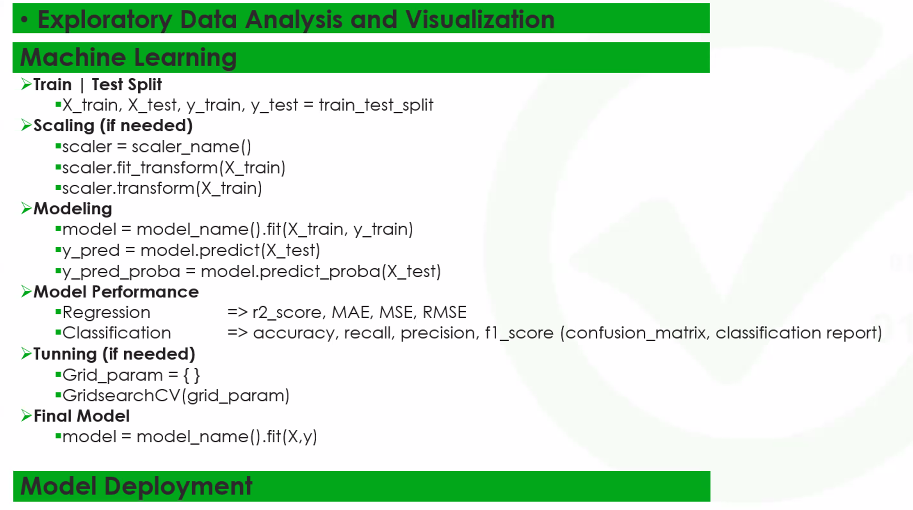

En sik kullaniloan rugularization metotlari

L1 lasso

L2 ridge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis = 1)
y = df["sales"]

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree = 5, include_bias = False)

poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 55)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

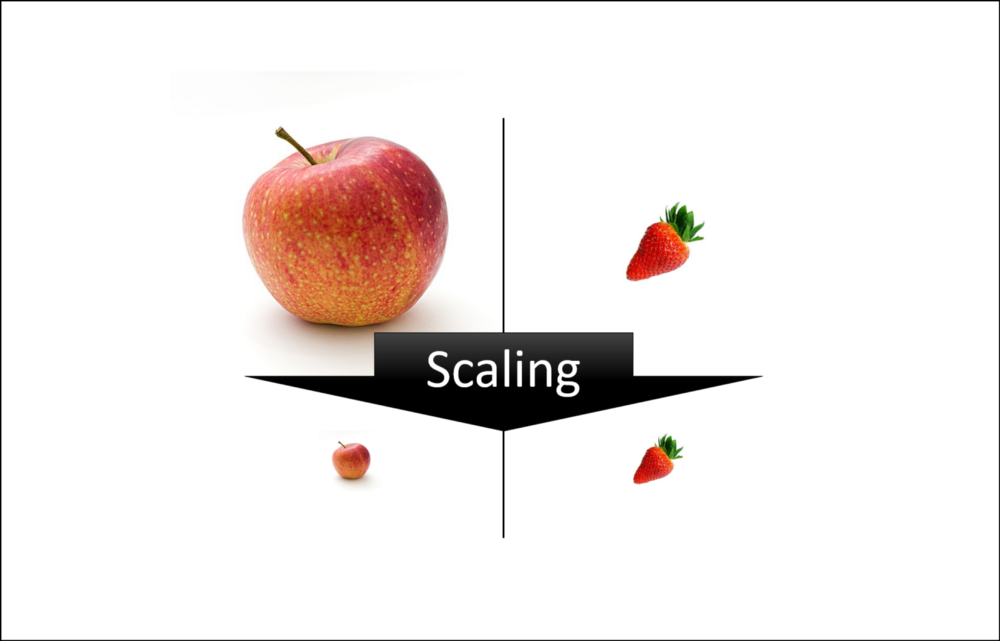

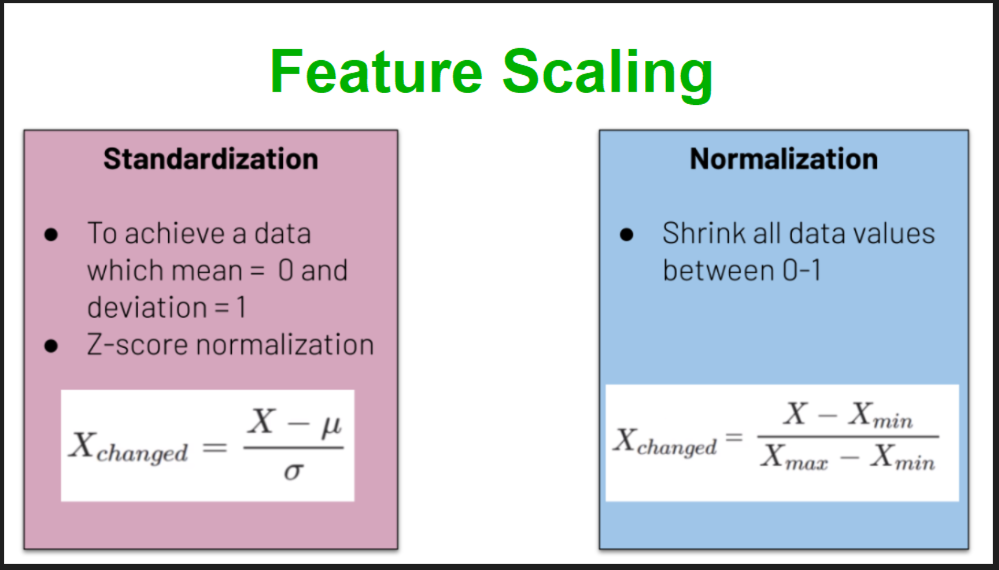

# Robust Scaler

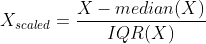

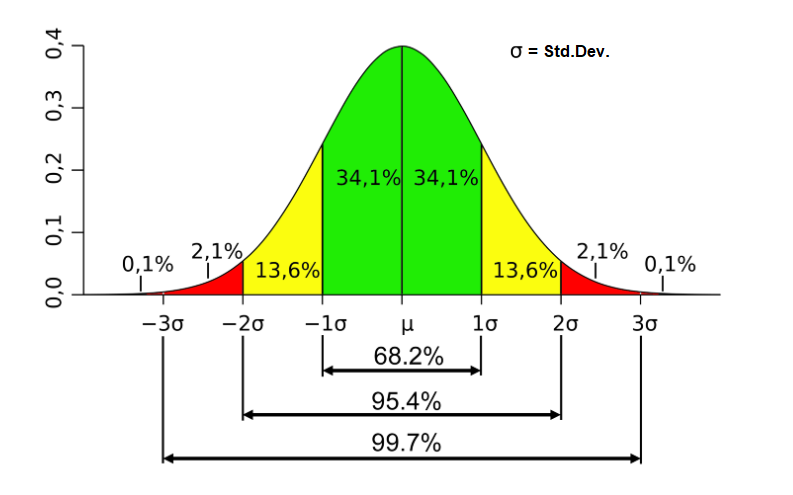

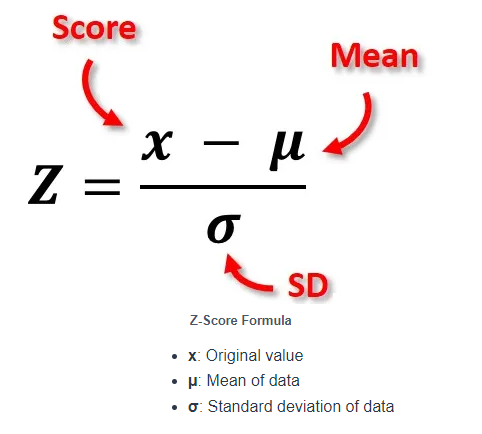

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [13]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [14]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


# Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() #lm linear regresyon değişkeni

In [17]:
lm.fit(X_train_scaled, y_train) #x trainin scaled datasını verdim yani scale edilmiş datayı verdim.

LinearRegression()

In [18]:
y_pred = lm.predict(X_test_scaled) # y_pred alırken yine scaled edilmiş test ve train datalarını alıyoruz
y_train_pred = lm.predict(X_train_scaled)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [21]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #modelin adı
ls      # R2 scorunda train ve test arasında varyans farkı çok fazla
# overfiting sözkonusu

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


# Multicolineratiy

https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/

https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [22]:
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if val > 0.90 and val <0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color :{color}'
 

In [23]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

# Cross Validation 

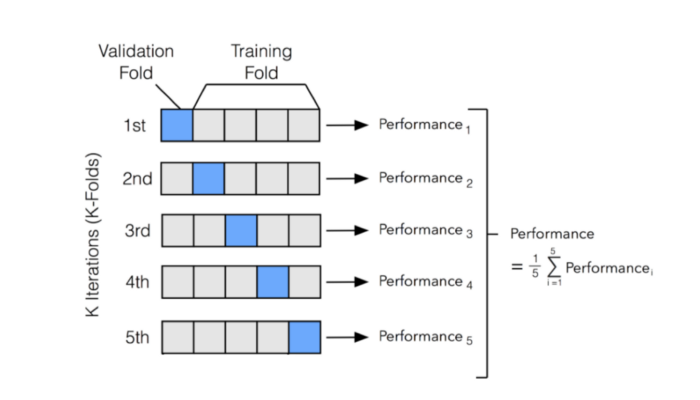m

In [24]:
from sklearn.metrics import SCORERS

In [25]:
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jacca

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

In [27]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [28]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002981,0.001999,0.367902,-1.271247,-19.204259,-4.382266
2,0.003998,0.001999,0.879658,-0.710463,-2.713292,-1.647207
3,0.001999,0.001998,0.977560,-0.395033,-0.622901,-0.789240
4,0.002000,0.000999,0.989369,-0.418977,-0.289361,-0.537923
5,0.001998,0.001999,0.166596,-1.474093,-15.409856,-3.925539


In [29]:
scores = pd.DataFrame(scores, index=range(1,6)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

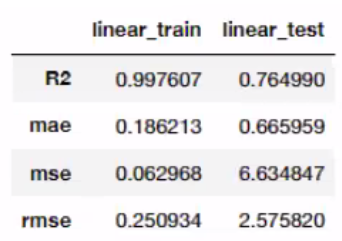

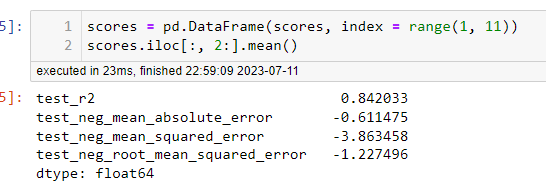

In [30]:
# ?? ustteki cv=10 cv=20

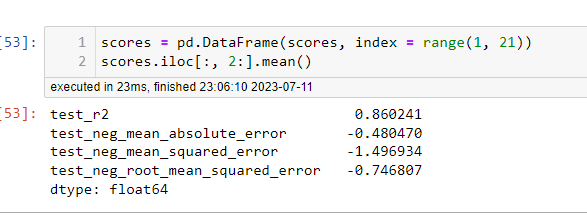

In [31]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [32]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Ridge Regression

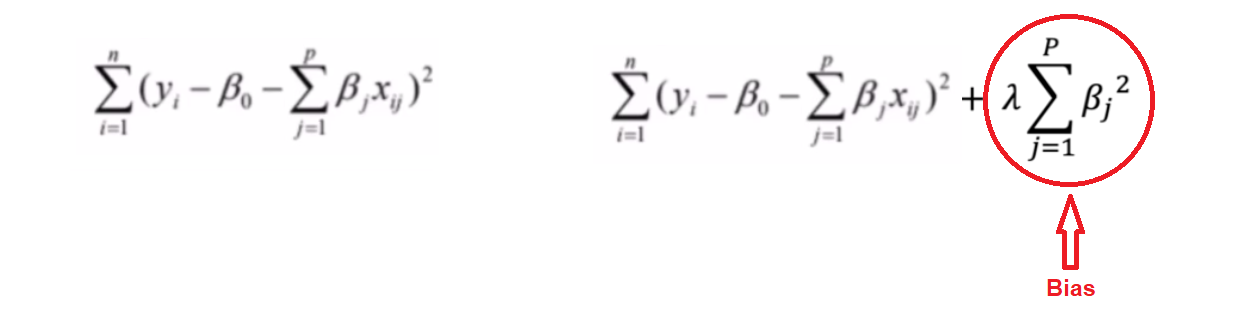

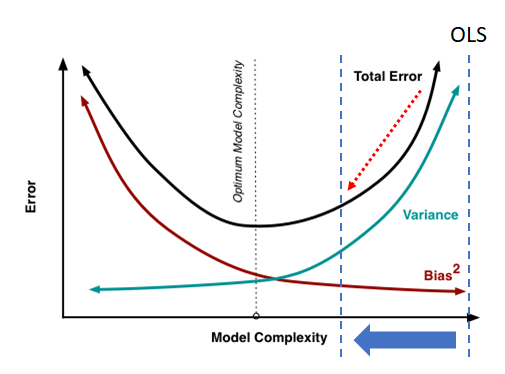

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=1, random_state=42)

In [35]:
ridge_model.fit(X_train_scaled, y_train) #scale edilen X_train ve y_train fit ederiz

Ridge(alpha=1, random_state=42)

In [36]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [37]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [38]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


In [39]:
model = Ridge(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                      scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [40]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000000,0.000000,0.988913,-0.405789,-0.336840,-0.580379
2,0.000000,0.005005,0.969951,-0.551469,-0.677493,-0.823099
3,0.002237,0.002001,0.950978,-0.552320,-1.360795,-1.166531
4,0.001998,0.000999,0.991259,-0.365106,-0.237919,-0.487769
5,0.001000,0.000999,0.986854,-0.343011,-0.243072,-0.493023


cv = 10
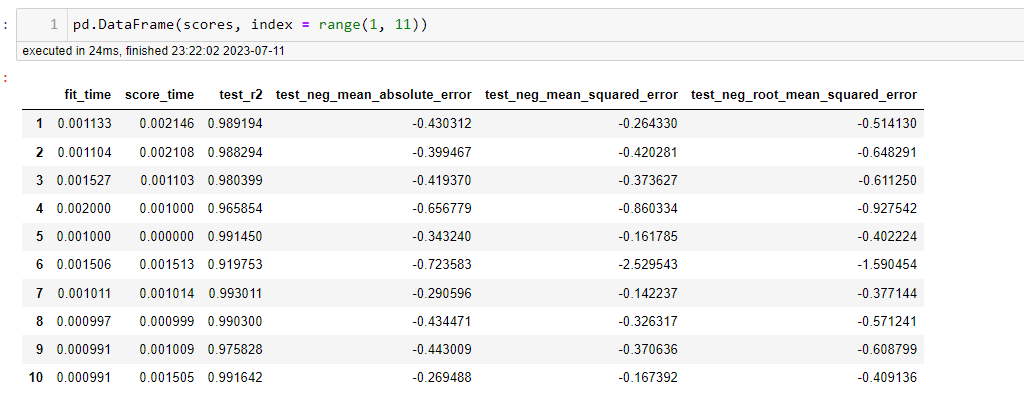

In [41]:
scores = pd.DataFrame(scores, index = range(1 ,6))
scores.iloc[:,2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

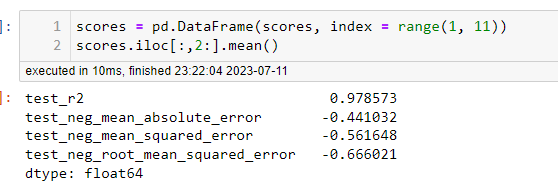

In [42]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # Overfitting sorunu cozuldu

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


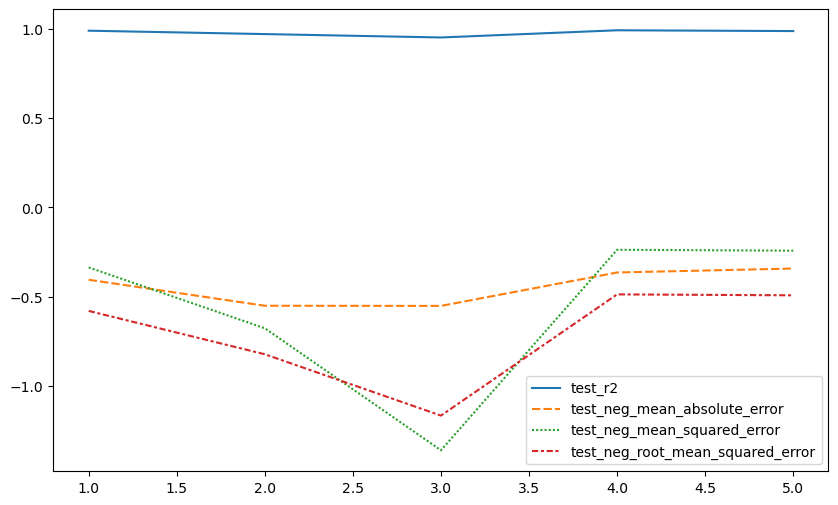

In [43]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

In [44]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163203e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [45]:
import sklearn
print(sklearn.__version__)

1.1.2


In [46]:
pip install scikit-learn==1.1.2

Note: you may need to restart the kernel to use updated packages.


In [47]:
import sklearn
print(sklearn.__version__)

1.1.2


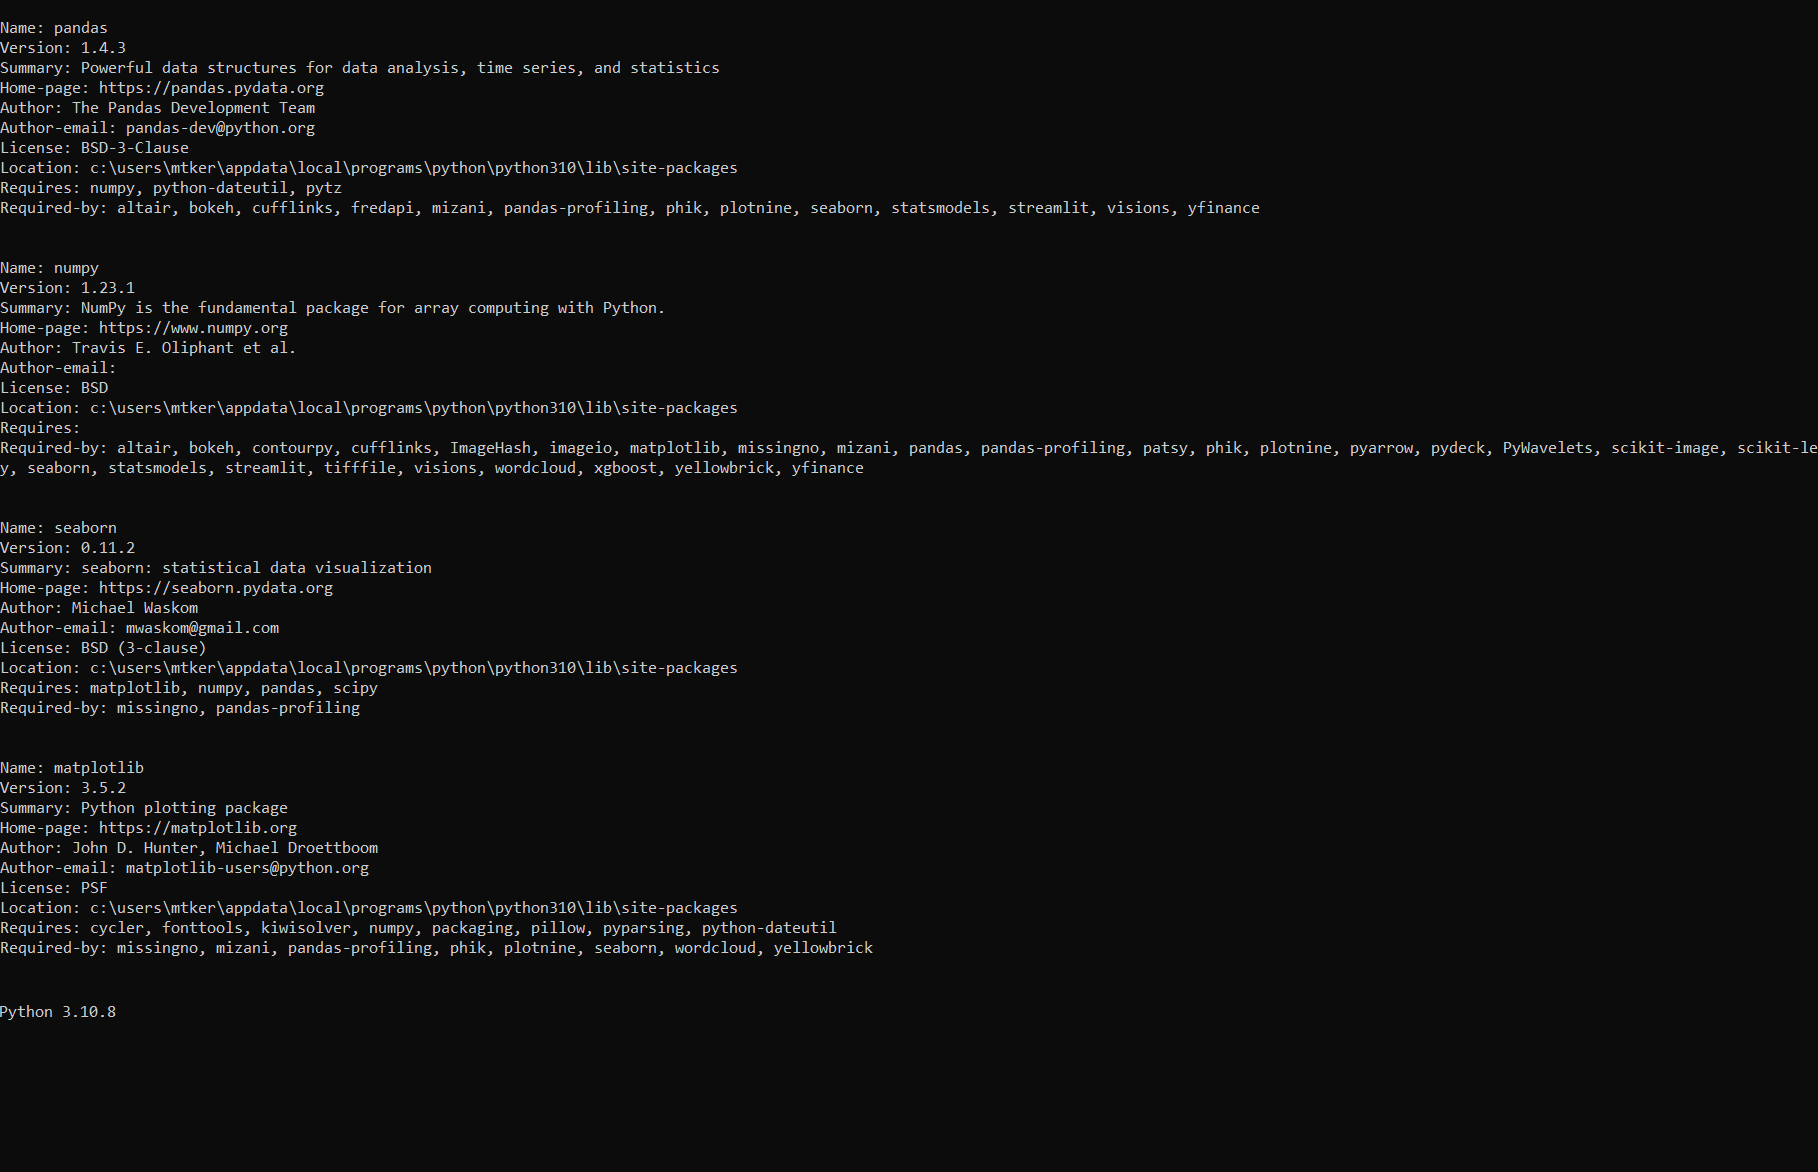

In [1]:
pip show numpy

Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\pir23oguz\anaconda3\lib\site-packages
Requires: 
Required-by: astropy, bkcharts, bokeh, Bottleneck, daal4py, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, tables, tifffile, xarray
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show pandas

Name: pandas
Version: 1.4.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\pir23oguz\anaconda3\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: datashader, holoviews, hvplot, seaborn, statsmodels, xarray
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\pir23oguz\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show matplotlib

Name: matplotlib
Version: 3.5.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\pir23oguz\anaconda3\lib\site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.
